# Code


In [184]:
import math 
import pandas as pd
import numpy as np
import operator
import matplotlib.pyplot as plt
import statistics
import timeit
import random
import copy
import scipy.cluster.hierarchy as shc
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
import matplotlib as mpl

class Main:  
    
    def __init__(self):
        self.datasetW = None
        self.datasetR = None
        self.RedArray = []
        self.WhiteArray = []
        
    def loadfiles(self, fileR, fileW):
        self.datasetW = pd.read_csv(fileW, sep = ';')
        self.datasetR = pd.read_csv(fileR, sep = ';')
        
    def loadWines(self):
         for i in range(len(self.datasetW)): 
            w = Wine(self.datasetW.iloc[i])
            self.WhiteArray.append(w)
        
         for i in range(len(self.datasetR)): 
            r = Wine(self.datasetR.iloc[i])
            self.RedArray.append(r)
    
    def remove_percent(self,percent,dataset):
        aux = copy.deepcopy(dataset)
        data = aux.values
        values_to_change = int((len(data[0])-2) * len(data) * percent)
        for i in range(values_to_change):
            column = random.randint(0,len(data[0])-2)
            row = random.randint(0,len(data)-1)
            data[row][column] = -1
        data1 = pd.DataFrame(data, columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
                                              'density','pH','sulphates','alcohol','quality']  )
        return data1
    
    def deletion(self, dataset):
        return dataset[(dataset.iloc[:, 1:] != -1).all(axis=1)]
    
    def substitution(self, dataset):
        return dataset.replace(to_replace = -1, value = 0)
    
    def normalization(self, dataset):
        aux = copy.deepcopy(dataset)
        X = aux.iloc[:, :-1].values
        y = aux.iloc[:, 11].values
        aux2 = normalize(X)
        data1 = pd.DataFrame(aux2, columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
                                              'density','pH','sulphates','alcohol']  )
        data1['quality']=pd.Series(y)
        return data1
    
    def discretization(self, dataset):
        aux = copy.deepcopy(dataset)
        aux2 = pd.cut(aux["quality"], bins=[0, 3, 7, 10],  labels=[0, 1, 2])
        aux['quality'] = aux2
        return aux
    
    def reduction(self, dataset):
        print("WIP")
        
def runAlgorithms(dataR,dataW, labelsR,labelsW ,eps , min_points, classifier_nodes):
    print("######Supervised Learning Algorithms######\n")
    decisionTreesClassifier(dataR,"Red",classifier_nodes)
    decisionTreesClassifier(dataW,"White",classifier_nodes)
    print()
    mlp(dataR,"Red")
    mlp(dataW,"White")
    print()
    knn(dataR,"Red")
    knn(dataW,"White")
    print("\n######Unsupervised Learning Algorithms######\n")
    print("k-Means:")
    k_means(dataR,"Red",labelsR)
    k_means(dataW,"White",labelsW)
    print("\nDBscan:")
    dbscan(dataR,"Red", eps,min_points )  #0.5,2
    dbscan(dataW,"White", eps, min_points) #0.6,2

    testEps(dataR,"Red")
    testEps(dataW,"White")
    testMinSamp(dataR,"Red")
    testMinSamp(dataW,"White")

    agglomerative_hierarchical_clustering(dataR,"Red",labelsR)
    agglomerative_hierarchical_clustering(dataW,"White",labelsW)

### Supervised Learning Algorithms

In [191]:
#labels is the quality(labels) and the rest are the features

#  Decision Trees
def decisionTreesClassifier(dataset, name, classifier_nodes):   
    features = dataset.iloc[:, :-1].values
    labels   = dataset.iloc[:, 11].values
    
    clf = DecisionTreeClassifier(criterion ='entropy',max_leaf_nodes=classifier_nodes, random_state=0)
    
    features_train, features_test, labels_train, labels_test = train_test_split(features,labels, random_state =1)
    
    clf.fit(features_train, labels_train)
    
    predicts = clf.predict(features_test)
    accuracy = accuracy_score(labels_test, predicts)*100
    
    print(name,": Accuracy of Decision Trees Classifier:", accuracy,"%")
    plt.figure(figsize=(10, 10))
    tree.plot_tree(clf,feature_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide','density','pH','sulphates','alcohol','quality'] )
    plt.show()    

# k-NN
def knn(dataset, name): 
    features = dataset.iloc[:, :-1].values
    labels   = dataset.iloc[:, 11].values
    
    knn = KNeighborsClassifier(n_neighbors=3)
    
    features_train, features_test, labels_train, labels_test = train_test_split(features, labels, random_state =1, test_size=0.3)
    
    knn.fit(features_train, labels_train) 
    
    predicts = knn.predict(features_test)
    accuracy = accuracy_score(labels_test, predicts)*100
    
    print(name,": Accuracy of k-NN classifier:", accuracy,"%")

# Multi-layer perceptron
def mlp(dataset, name):
    features = dataset.iloc[:, :-1].values
    labels   = dataset.iloc[:, 11].values
    
    features_train, features_test, labels_train, labels_test = train_test_split(features, labels, random_state=1, test_size=0.3)
    
    clf = MLPClassifier(random_state=1, max_iter=300).fit(features_train, labels_train)
   
    predicts = clf.predict(features_test)
    accuracy = accuracy_score(labels_test, predicts)*100
    
    print(name,": Accuracy of Multi-layer perceptron Classifier:", accuracy,"%")
    
    


###  Unsupervised learning algorithms

In [188]:
# k-Means
def k_means(dataset, name, n_clusters):
    features = dataset.iloc[:, :-1].values
    labels   = dataset.iloc[:, 11].values
   
    clf = KMeans(n_clusters = n_clusters, random_state = 1 ).fit(features)
    
    print("\n",name,":")
    getMostCommonValueOfQuality(features,labels,clf.labels_,n_clusters)
    
# DBScan 
def dbscan(dataset, name, epsilon, minpoints):
    print("\n", name,"DBscan\n")
    features = dataset.iloc[:, :-1].values
    labels   = dataset.iloc[:, 11].values
    
    scaler = StandardScaler()
    X2     = scaler.fit_transform(features)
    
    pca = PCA(n_components = 2)
    X_principal = pca.fit_transform(X2)
    X_principal = pd.DataFrame(X_principal)
    X_principal.columns = ['P1', 'P2']
    
    db = DBSCAN(eps = epsilon, min_samples = minpoints).fit(X_principal)
    labels = db.labels_
    
    core_samples_mask = np.zeros_like(db.labels_, dtype = bool)
    core_samples_mask[db.core_sample_indices_] = True

    n_clusters_ = len( set(labels) ) - (1 if -1 in labels else 0)
    
    # Black color removed and is used for noise instead.
    n_noise_ = list(labels).count(-1)
    unique_labels = set(labels)

    #returns the color map
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
    
    for k, c in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            c = [0, 0, 0, 1]

        class_member_mask = labels == k

        #plots core points
        xy = X_principal[class_member_mask & core_samples_mask]
        plt.plot( xy.iloc[:, 0], xy.iloc[:, 1], "o", markerfacecolor = tuple(c), markeredgecolor = 'k', markersize = 10)

        #plots border points points
        xy = X_principal[class_member_mask & ~core_samples_mask]
        plt.plot( xy.iloc[:, 0],  xy.iloc[:, 1], "o", markerfacecolor = tuple(c), markeredgecolor = 'k', markersize = 5)
    plt.title('Number of clusters: %d' % n_clusters_)
    plt.show()
    getMostCommonValueOfQuality(features,labels,db.labels_,n_clusters_)
    
# Agglomerative hierarchical clustering

def agglomerative_hierarchical_clustering(dataset, name, n_clusters_):
    print("\n", name,"Agglomerative hierarchical clustering\n")
    features = dataset.iloc[:, :-1].values
    labels   = dataset.iloc[:, 11].values
    
    scaler = StandardScaler()
    X2     = scaler.fit_transform(features)
    
    pca = PCA(n_components = 2)
    X_principal = pca.fit_transform(X2)
    X_principal = pd.DataFrame(X_principal)
    X_principal.columns = ['P1', 'P2']
    
    ac = AgglomerativeClustering(n_clusters = n_clusters_).fit(X_principal) 
    
    getMostCommonValueOfQuality(features,labels,ac.labels_,n_clusters_)
    
    plt.figure(figsize =(6, 6))
    plt.scatter(X_principal['P1'], X_principal['P2'], c = ac.fit_predict(X_principal), cmap ='rainbow')
    plt.show()

# Aux methods for optimization and eval
def testEps(dataset, name):
    features = dataset.iloc[:, :-1].values
    labels   = dataset.iloc[:, 11].values
    
    features_train, features_test, labels_train, labels_test = train_test_split(features,labels, stratify=labels, test_size=0.3)
    
    # Define paraameter range and score lists
    eps_range = np.arange(0, 5,0.1)[1:]
    clusters = []

    # Train a knn_model for every neighbour value in our list
    for i in eps_range:
        dbscan=DBSCAN(eps = i).fit(features_train,labels_train)
        clusters.append(len((np.unique(dbscan.fit_predict(features_train)))))

    # Plot our results
    mpl.rcParams['figure.figsize'] = (9.0, 6.0)
    plt.plot(eps_range,clusters,label="Train",linewidth=2, color='#6A51A3') 
    plt.legend()
    plt.title('DSCAN EPS Sensitivity')
    plt.xlabel('EPS')
    plt.ylabel('Clusters')
    plt.show()
    
def testMinSamp(dataset, name):
    
    features = dataset.iloc[:, :-1].values
    labels   = dataset.iloc[:, 11].values

    features_train, features_test, labels_train, labels_test = train_test_split(features,labels, stratify=labels, test_size=0.3)
    
    # Define paraameter range and score lists
    min_samples_range = np.arange(0, 5,0.1)[1:]
    clusters = []

    # Train a knn_model for every neighbour value in our list
    for i in min_samples_range:
        dbscan=DBSCAN(eps = i)
        clusters.append(len((np.unique(dbscan.fit_predict(features_train)))))

    # Plot our results
    mpl.rcParams['figure.figsize'] = (9.0, 6.0)
    plt.plot(min_samples_range, clusters, label="Train", linewidth=2, color='#6A51A3')
    plt.legend()
    plt.title('DSCAN Min Samples Sensitivity')
    plt.xlabel('Min Samples')
    plt.ylabel('Clusters')
    plt.show()
    
def getMostCommonValueOfQuality(features,labels,predicts,n_clusters):
    features_labels   = list(zip(features,labels))
    features_predicts = list(zip(features,predicts))
    
    clusters = []
    for i in range(n_clusters):
        clusters.append(list())
        
    for m,n in zip(features_labels,features_predicts):
        clusters[n[1]].append(m[1])     
    
    for i in range(len(clusters)):
        print("Cluster",i,"- Most common value of quality:",max(set(clusters[i]), key = clusters[i].count),"\n")
        for l in sorted(list(dict.fromkeys(clusters[i]))):
            print("   Quality", l,"-",clusters[i].count(l),"occurrences.")
        print()
    


# First Experiment

######FIRST EXPERIMENT######

######Supervised Learning Algorithms######

Red : Accuracy of Decision Trees Classifier: 56.99999999999999 %


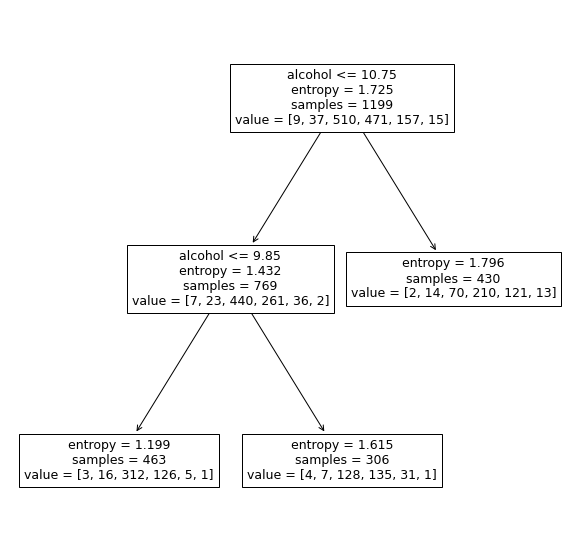

White : Accuracy of Decision Trees Classifier: 48.40816326530612 %


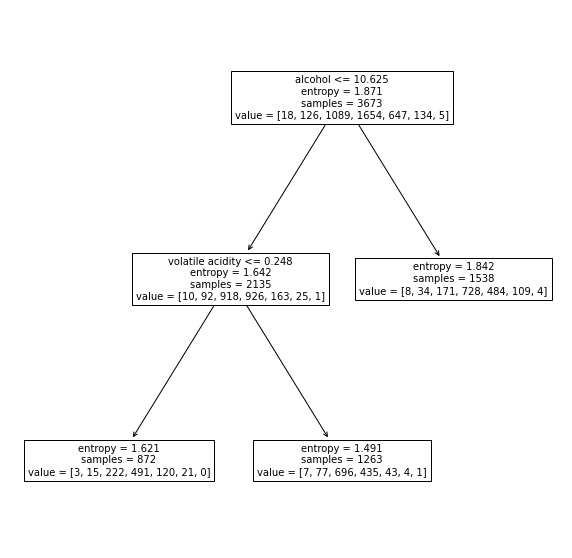


Red : Accuracy of Multi-layer perceptron Classifier: 60.83333333333333 %
White : Accuracy of Multi-layer perceptron Classifier: 44.48979591836735 %

Red : Accuracy of k-NN classifier: 51.66666666666667 %
White : Accuracy of k-NN classifier: 47.61904761904761 %

######Unsupervised Learning Algorithms######

k-Means:

 Red :
Cluster 0 - Most common value of quality: 6 

   Quality 3 - 6 occurrences.
   Quality 4 - 28 occurrences.
   Quality 5 - 199 occurrences.
   Quality 6 - 244 occurrences.
   Quality 7 - 110 occurrences.
   Quality 8 - 11 occurrences.

Cluster 1 - Most common value of quality: 5 

   Quality 3 - 1 occurrences.
   Quality 4 - 10 occurrences.
   Quality 5 - 134 occurrences.
   Quality 6 - 124 occurrences.
   Quality 7 - 20 occurrences.
   Quality 8 - 2 occurrences.

Cluster 2 - Most common value of quality: 6 

   Quality 3 - 3 occurrences.
   Quality 4 - 10 occurrences.
   Quality 5 - 166 occurrences.
   Quality 6 - 210 occurrences.
   Quality 7 - 55 occurrences.
   Q

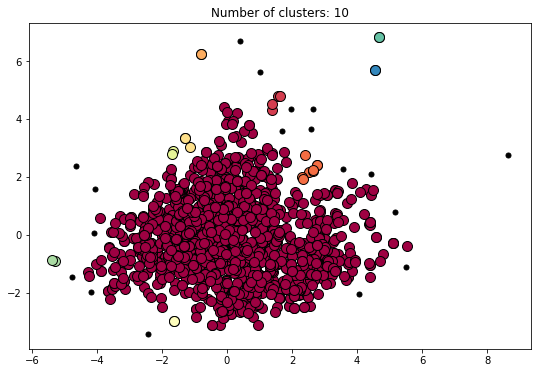

Cluster 0 - Most common value of quality: 0 

   Quality 0 - 1554 occurrences.

Cluster 1 - Most common value of quality: 1 

   Quality 1 - 4 occurrences.

Cluster 2 - Most common value of quality: 2 

   Quality 2 - 8 occurrences.

Cluster 3 - Most common value of quality: 3 

   Quality 3 - 2 occurrences.

Cluster 4 - Most common value of quality: 4 

   Quality 4 - 3 occurrences.

Cluster 5 - Most common value of quality: 5 

   Quality 5 - 2 occurrences.

Cluster 6 - Most common value of quality: 6 

   Quality 6 - 2 occurrences.

Cluster 7 - Most common value of quality: 7 

   Quality 7 - 2 occurrences.

Cluster 8 - Most common value of quality: 8 

   Quality 8 - 2 occurrences.

Cluster 9 - Most common value of quality: -1 

   Quality -1 - 18 occurrences.
   Quality 9 - 2 occurrences.


 White DBscan



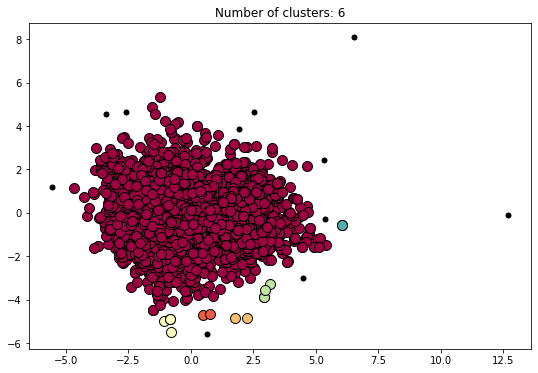

Cluster 0 - Most common value of quality: 0 

   Quality 0 - 4873 occurrences.

Cluster 1 - Most common value of quality: 1 

   Quality 1 - 2 occurrences.

Cluster 2 - Most common value of quality: 2 

   Quality 2 - 2 occurrences.

Cluster 3 - Most common value of quality: 3 

   Quality 3 - 4 occurrences.

Cluster 4 - Most common value of quality: 4 

   Quality 4 - 4 occurrences.

Cluster 5 - Most common value of quality: -1 

   Quality -1 - 11 occurrences.
   Quality 5 - 2 occurrences.


DBscan Tests:


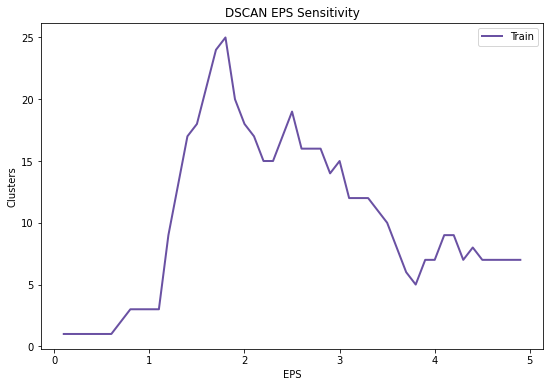

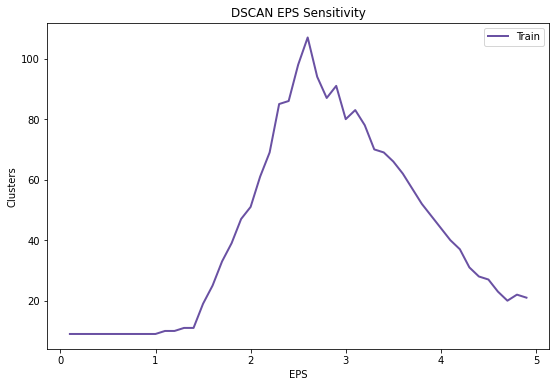

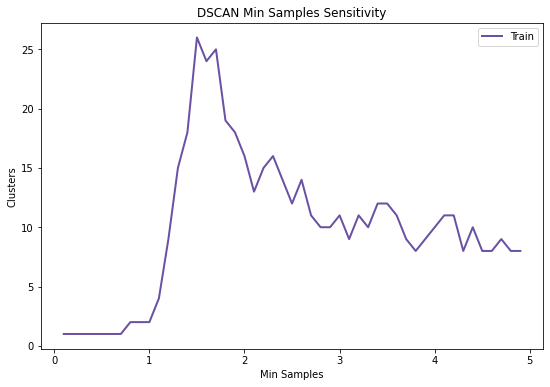

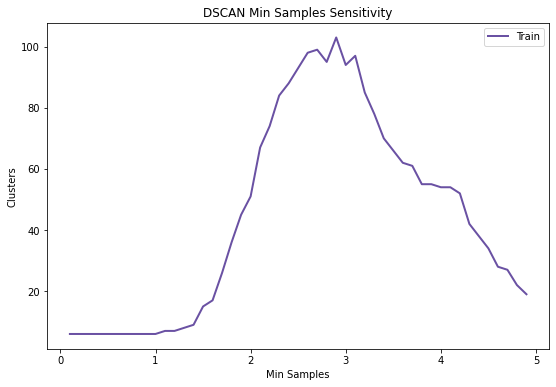


Agglomerative hierarchical clustering:

 Red Agglomerative hierarchical clustering

Cluster 0 - Most common value of quality: 6 

   Quality 3 - 6 occurrences.
   Quality 4 - 30 occurrences.
   Quality 5 - 191 occurrences.
   Quality 6 - 195 occurrences.
   Quality 7 - 36 occurrences.
   Quality 8 - 4 occurrences.

Cluster 1 - Most common value of quality: 6 

   Quality 4 - 12 occurrences.
   Quality 5 - 152 occurrences.
   Quality 6 - 219 occurrences.
   Quality 7 - 97 occurrences.
   Quality 8 - 8 occurrences.

Cluster 2 - Most common value of quality: 6 

   Quality 4 - 1 occurrences.
   Quality 5 - 43 occurrences.
   Quality 6 - 88 occurrences.
   Quality 7 - 45 occurrences.
   Quality 8 - 6 occurrences.

Cluster 3 - Most common value of quality: 5 

   Quality 3 - 2 occurrences.
   Quality 4 - 6 occurrences.
   Quality 5 - 189 occurrences.
   Quality 6 - 99 occurrences.
   Quality 7 - 11 occurrences.

Cluster 4 - Most common value of quality: 5 

   Quality 4 - 1 occurrences.
  

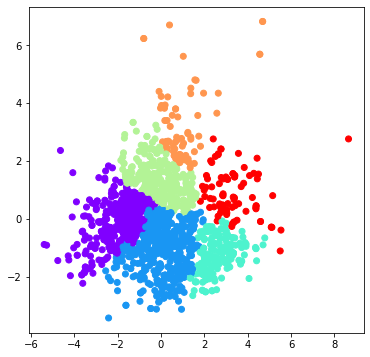


 White Agglomerative hierarchical clustering

Cluster 0 - Most common value of quality: 5 

   Quality 3 - 7 occurrences.
   Quality 4 - 28 occurrences.
   Quality 5 - 520 occurrences.
   Quality 6 - 473 occurrences.
   Quality 7 - 64 occurrences.
   Quality 8 - 11 occurrences.

Cluster 1 - Most common value of quality: 6 

   Quality 3 - 4 occurrences.
   Quality 4 - 14 occurrences.
   Quality 5 - 261 occurrences.
   Quality 6 - 300 occurrences.
   Quality 7 - 72 occurrences.
   Quality 8 - 11 occurrences.
   Quality 9 - 1 occurrences.

Cluster 2 - Most common value of quality: 6 

   Quality 3 - 2 occurrences.
   Quality 4 - 33 occurrences.
   Quality 5 - 172 occurrences.
   Quality 6 - 191 occurrences.
   Quality 7 - 65 occurrences.
   Quality 8 - 9 occurrences.

Cluster 3 - Most common value of quality: 6 

   Quality 3 - 2 occurrences.
   Quality 4 - 23 occurrences.
   Quality 5 - 98 occurrences.
   Quality 6 - 334 occurrences.
   Quality 7 - 267 occurrences.
   Quality 8 - 67 oc

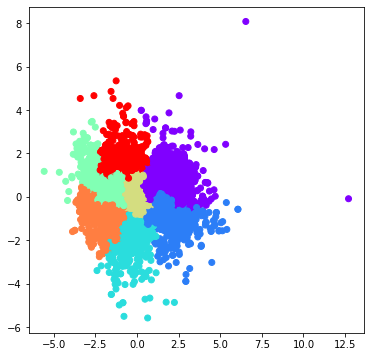

In [193]:
random.seed(1)

m = Main()
m.loadfiles("winequality-red.csv", "winequality-white.csv")

print("######FIRST EXPERIMENT######\n")
print("######Supervised Learning Algorithms######\n")

decisionTreesClassifier(m.datasetR,"Red",3)
decisionTreesClassifier(m.datasetW,"White",3)

print()

mlp(m.datasetR,"Red")
mlp(m.datasetW,"White")

print()

knn(m.datasetR,"Red")
knn(m.datasetW,"White")

print("\n######Unsupervised Learning Algorithms######\n")
print("k-Means:")
k_means(m.datasetR,"Red",6)
k_means(m.datasetW,"White",7)

print("\nDBscan:")
dbscan(m.datasetR,"Red", 0.5, 2 ) 
dbscan(m.datasetW,"White", 0.6, 2)

print("\nDBscan Tests:")
testEps(m.datasetR,"Red")
testEps(m.datasetW,"White")
testMinSamp(m.datasetR,"Red")
testMinSamp(m.datasetW,"White")

print("\nAgglomerative hierarchical clustering:")
agglomerative_hierarchical_clustering(m.datasetR,"Red",6)
agglomerative_hierarchical_clustering(m.datasetW,"White",7)


# Second Experiment

######Supervised Learning Algorithms######

Red : Accuracy of Decision Trees Classifier: 48.275862068965516 %


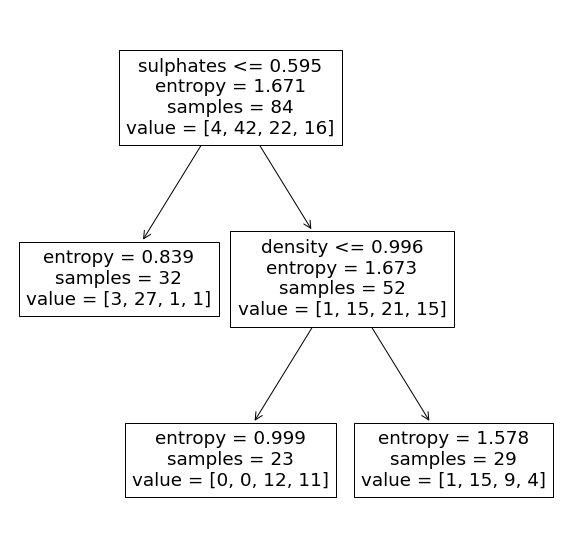

White : Accuracy of Decision Trees Classifier: 40.78947368421053 %


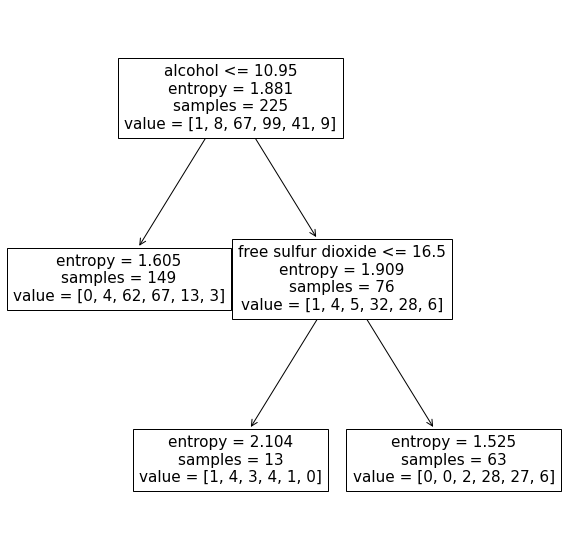


Red : Accuracy of Multi-layer perceptron Classifier: 32.35294117647059 %
White : Accuracy of Multi-layer perceptron Classifier: 46.15384615384615 %

Red : Accuracy of k-NN classifier: 35.294117647058826 %
White : Accuracy of k-NN classifier: 40.65934065934066 %

######Unsupervised Learning Algorithms######

k-Means:

 Red :
Cluster 0 - Most common value of quality: 6.0 

   Quality 4.0 - 1 occurrences.
   Quality 5.0 - 7 occurrences.
   Quality 6.0 - 8 occurrences.
   Quality 7.0 - 6 occurrences.

Cluster 1 - Most common value of quality: 5.0 

   Quality 4.0 - 1 occurrences.
   Quality 5.0 - 7 occurrences.

Cluster 2 - Most common value of quality: 5.0 

   Quality 4.0 - 1 occurrences.
   Quality 5.0 - 8 occurrences.
   Quality 6.0 - 5 occurrences.

Cluster 3 - Most common value of quality: 6.0 

   Quality 5.0 - 9 occurrences.
   Quality 6.0 - 10 occurrences.
   Quality 7.0 - 7 occurrences.

Cluster 4 - Most common value of quality: 5.0 

   Quality 5.0 - 8 occurrences.
   Quality 6

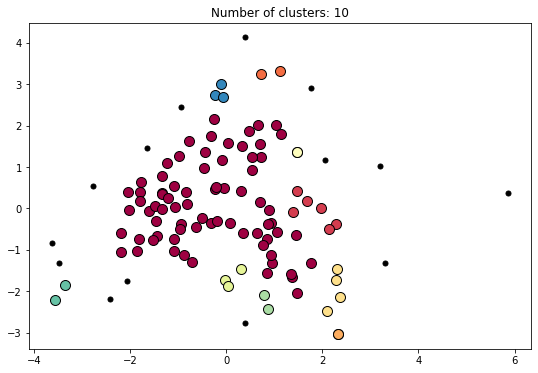

Cluster 0 - Most common value of quality: 0 

   Quality 0 - 73 occurrences.

Cluster 1 - Most common value of quality: 1 

   Quality 1 - 6 occurrences.

Cluster 2 - Most common value of quality: 2 

   Quality 2 - 2 occurrences.

Cluster 3 - Most common value of quality: 3 

   Quality 3 - 2 occurrences.

Cluster 4 - Most common value of quality: 4 

   Quality 4 - 4 occurrences.

Cluster 5 - Most common value of quality: 5 

   Quality 5 - 2 occurrences.

Cluster 6 - Most common value of quality: 6 

   Quality 6 - 3 occurrences.

Cluster 7 - Most common value of quality: 7 

   Quality 7 - 2 occurrences.

Cluster 8 - Most common value of quality: 8 

   Quality 8 - 2 occurrences.

Cluster 9 - Most common value of quality: -1 

   Quality -1 - 14 occurrences.
   Quality 9 - 3 occurrences.


 White DBscan



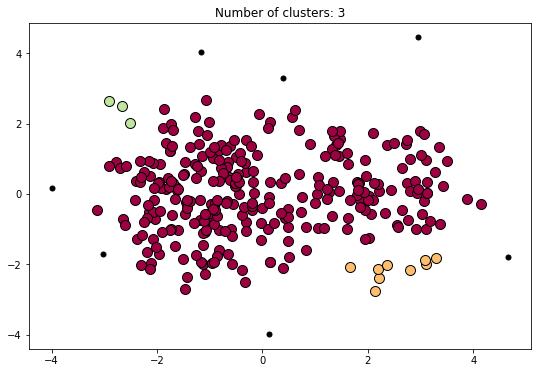

Cluster 0 - Most common value of quality: 0 

   Quality 0 - 282 occurrences.

Cluster 1 - Most common value of quality: 1 

   Quality 1 - 9 occurrences.

Cluster 2 - Most common value of quality: -1 

   Quality -1 - 7 occurrences.
   Quality 2 - 3 occurrences.



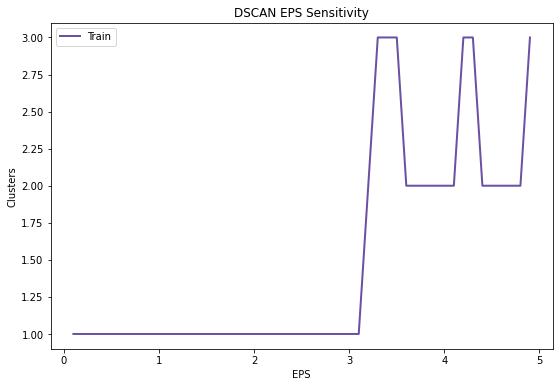

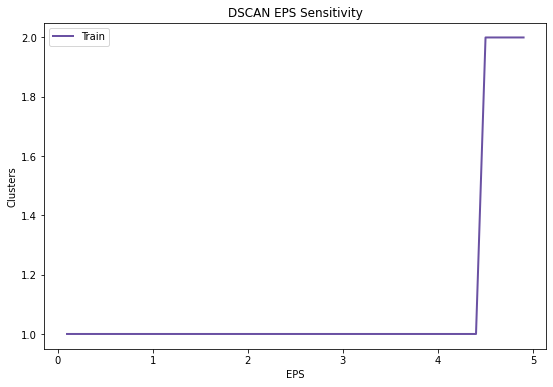

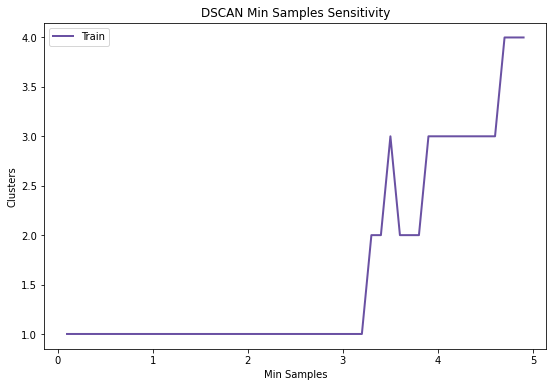

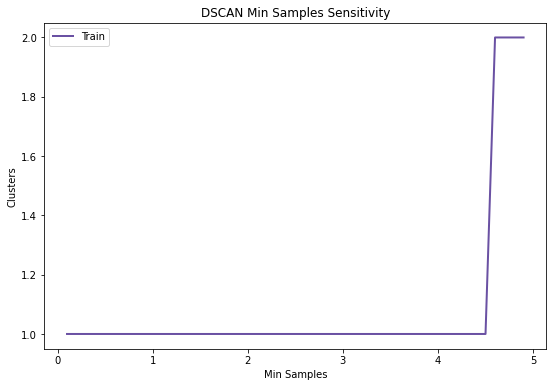


 Red Agglomerative hierarchical clustering

Cluster 0 - Most common value of quality: 5.0 

   Quality 4.0 - 1 occurrences.
   Quality 5.0 - 19 occurrences.
   Quality 6.0 - 8 occurrences.

Cluster 1 - Most common value of quality: 5.0 

   Quality 4.0 - 3 occurrences.
   Quality 5.0 - 15 occurrences.
   Quality 6.0 - 13 occurrences.
   Quality 7.0 - 3 occurrences.

Cluster 2 - Most common value of quality: 5.0 

   Quality 4.0 - 1 occurrences.
   Quality 5.0 - 11 occurrences.
   Quality 6.0 - 4 occurrences.
   Quality 7.0 - 4 occurrences.

Cluster 3 - Most common value of quality: 6.0 

   Quality 5.0 - 2 occurrences.
   Quality 6.0 - 9 occurrences.
   Quality 7.0 - 9 occurrences.

Cluster 4 - Most common value of quality: 6.0 

   Quality 4.0 - 1 occurrences.
   Quality 5.0 - 3 occurrences.
   Quality 6.0 - 4 occurrences.
   Quality 7.0 - 2 occurrences.

Cluster 5 - Most common value of quality: 5.0 

   Quality 5.0 - 1 occurrences.



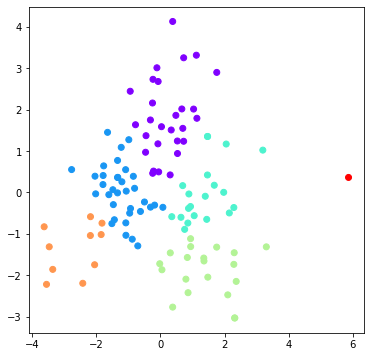


 White Agglomerative hierarchical clustering

Cluster 0 - Most common value of quality: 6.0 

   Quality 4.0 - 1 occurrences.
   Quality 5.0 - 13 occurrences.
   Quality 6.0 - 35 occurrences.
   Quality 7.0 - 31 occurrences.
   Quality 8.0 - 6 occurrences.

Cluster 1 - Most common value of quality: 5.0 

   Quality 4.0 - 2 occurrences.
   Quality 5.0 - 16 occurrences.
   Quality 6.0 - 13 occurrences.
   Quality 7.0 - 3 occurrences.
   Quality 8.0 - 1 occurrences.

Cluster 2 - Most common value of quality: 6.0 

   Quality 3.0 - 1 occurrences.
   Quality 5.0 - 16 occurrences.
   Quality 6.0 - 19 occurrences.
   Quality 7.0 - 3 occurrences.
   Quality 8.0 - 1 occurrences.

Cluster 3 - Most common value of quality: 5.0 

   Quality 3.0 - 1 occurrences.
   Quality 4.0 - 1 occurrences.
   Quality 5.0 - 14 occurrences.
   Quality 6.0 - 11 occurrences.
   Quality 7.0 - 5 occurrences.

Cluster 4 - Most common value of quality: 6.0 

   Quality 3.0 - 2 occurrences.
   Quality 4.0 - 3 occurrenc

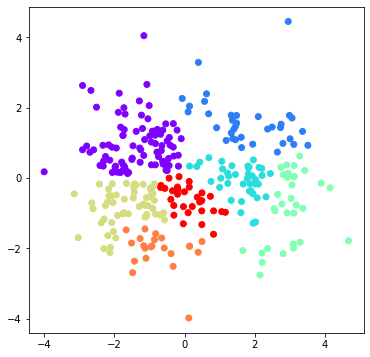

In [192]:
m = Main()

m.loadfiles("winequality-red.csv", "winequality-white.csv")

auxR = m.remove_percent(0.3, m.datasetR)
auxW = m.remove_percent(0.3, m.datasetW)

deletion = True
substituion = False

if deletion:
    dataR = m.deletion(auxR)
    dataW = m.deletion(auxW)
    print("######Supervised Learning Algorithms######\n")
    decisionTreesClassifier(dataR,"Red",3)
    decisionTreesClassifier(dataW,"White",3)
    
    print()
    
    mlp(dataR,"Red")
    mlp(dataW,"White")
    
    print()
    
    knn(dataR,"Red")
    knn(dataW,"White")
    
    print("\n######Unsupervised Learning Algorithms######\n")
    print("k-Means:")
    k_means(dataR,"Red",6)
    k_means(dataW,"White",7)
    
    print("\nDBscan:")
    dbscan(dataR,"Red", 0.5, 2 ) 
    dbscan(dataW,"White", 0.6, 2)

    testEps(dataR,"Red")
    testEps(dataW,"White")
    testMinSamp(dataR,"Red")
    testMinSamp(dataW,"White")

    agglomerative_hierarchical_clustering(dataR,"Red",6)
    agglomerative_hierarchical_clustering(dataW,"White",7)
    
elif substituion:
    
    dataR = m.substitution(auxR)
    dataW = m.substitution(auxW)
    
    print("######Supervised Learning Algorithms######\n")
    decisionTreesClassifier(dataR,"Red")
    decisionTreesClassifier(dataW,"White")
    
    print()
    
    mlp(dataR,"Red")
    mlp(dataW,"White")
    
    print()
    
    knn(dataR,"Red")
    knn(dataW,"White")
    
    print("\n######Unsupervised Learning Algorithms######\n")
    
    print("k-Means:")
    k_means(dataR,"Red",6)
    k_means(dataW,"White",7)
    
    print("\nDBscan:")
    dbscan(dataR,"Red", 0.5, 2 ) 
    dbscan(dataW,"White", 0.6, 2)

    testEps(dataR,"Red")
    testEps(dataW,"White")
    testMinSamp(dataR,"Red")
    testMinSamp(dataW,"White")

    agglomerative_hierarchical_clustering(dataR,"Red",6)
    agglomerative_hierarchical_clustering(dataW,"White",7)





# Third Experiment

######Supervised Learning Algorithms######

Red : Accuracy of Decision Trees Classifier: 51.0 %


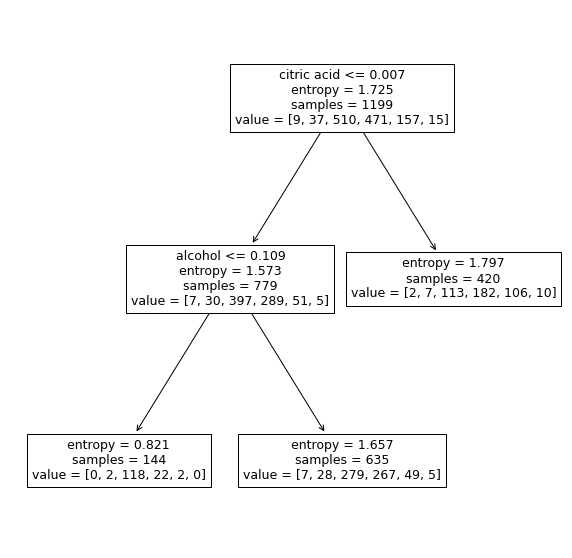

White : Accuracy of Decision Trees Classifier: 44.40816326530612 %


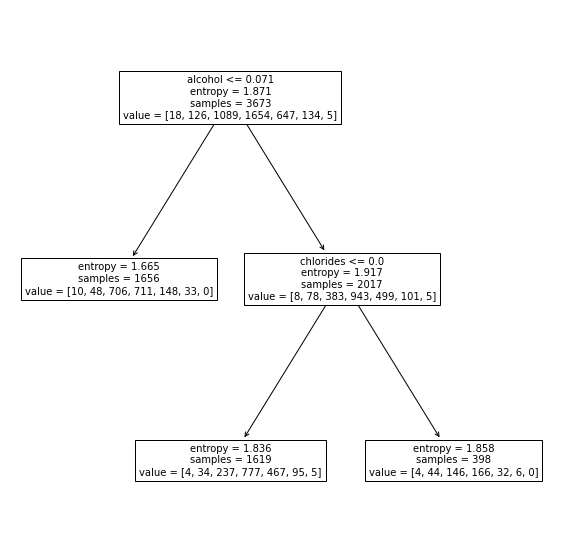

c:\users\loure\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Red : Accuracy of Multi-layer perceptron Classifier: 54.58333333333333 %


c:\users\loure\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


White : Accuracy of Multi-layer perceptron Classifier: 49.38775510204081 %

Red : Accuracy of k-NN classifier: 49.583333333333336 %
White : Accuracy of k-NN classifier: 48.095238095238095 %

######Unsupervised Learning Algorithms######

k-Means:

 Red :
Cluster 0 - Most common value of quality: 6 

   Quality 3 - 1 occurrences.
   Quality 4 - 7 occurrences.
   Quality 5 - 119 occurrences.
   Quality 6 - 123 occurrences.
   Quality 7 - 26 occurrences.
   Quality 8 - 2 occurrences.

Cluster 1 - Most common value of quality: 6 

   Quality 3 - 2 occurrences.
   Quality 4 - 10 occurrences.
   Quality 5 - 32 occurrences.
   Quality 6 - 47 occurrences.
   Quality 7 - 37 occurrences.
   Quality 8 - 2 occurrences.

Cluster 2 - Most common value of quality: 5 

   Quality 4 - 9 occurrences.
   Quality 5 - 255 occurrences.
   Quality 6 - 96 occurrences.
   Quality 7 - 12 occurrences.
   Quality 8 - 2 occurrences.

Cluster 3 - Most common value of quality: 6 

   Quality 3 - 1 occurrences.
   Qua

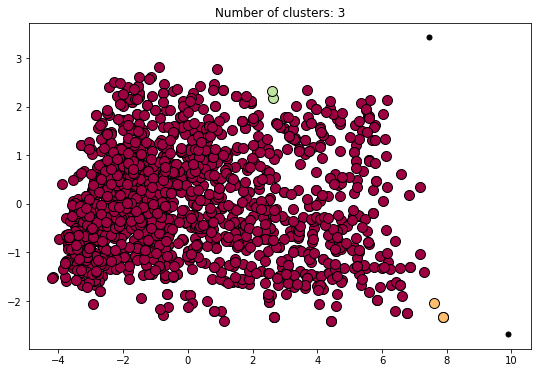

Cluster 0 - Most common value of quality: 0 

   Quality 0 - 1592 occurrences.

Cluster 1 - Most common value of quality: 1 

   Quality 1 - 3 occurrences.

Cluster 2 - Most common value of quality: 2 

   Quality -1 - 2 occurrences.
   Quality 2 - 2 occurrences.


 White DBscan



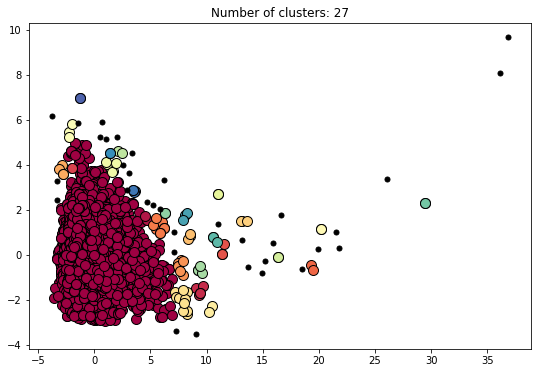

Cluster 0 - Most common value of quality: 0 

   Quality 0 - 4773 occurrences.

Cluster 1 - Most common value of quality: 1 

   Quality 1 - 3 occurrences.

Cluster 2 - Most common value of quality: 2 

   Quality 2 - 5 occurrences.

Cluster 3 - Most common value of quality: 3 

   Quality 3 - 2 occurrences.

Cluster 4 - Most common value of quality: 4 

   Quality 4 - 3 occurrences.

Cluster 5 - Most common value of quality: 5 

   Quality 5 - 2 occurrences.

Cluster 6 - Most common value of quality: 6 

   Quality 6 - 8 occurrences.

Cluster 7 - Most common value of quality: 7 

   Quality 7 - 6 occurrences.

Cluster 8 - Most common value of quality: 8 

   Quality 8 - 4 occurrences.

Cluster 9 - Most common value of quality: 9 

   Quality 9 - 3 occurrences.

Cluster 10 - Most common value of quality: 10 

   Quality 10 - 3 occurrences.

Cluster 11 - Most common value of quality: 11 

   Quality 11 - 10 occurrences.

Cluster 12 - Most common value of quality: 12 

   Quality 12 - 2 

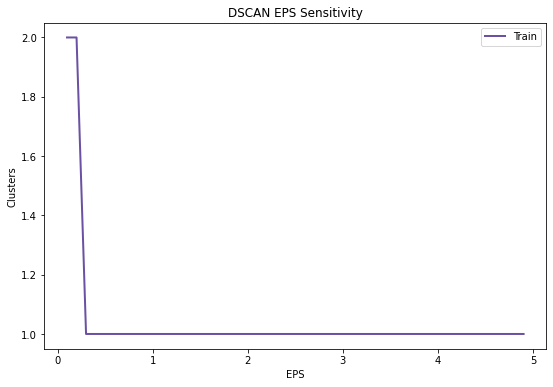

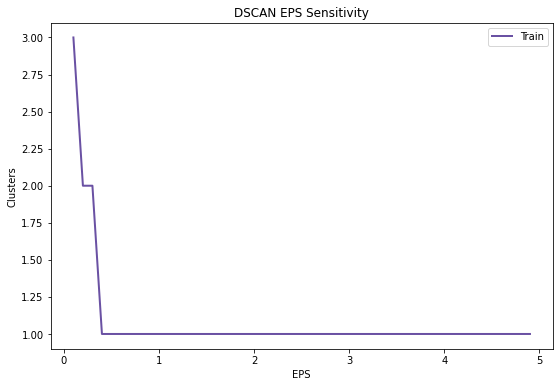

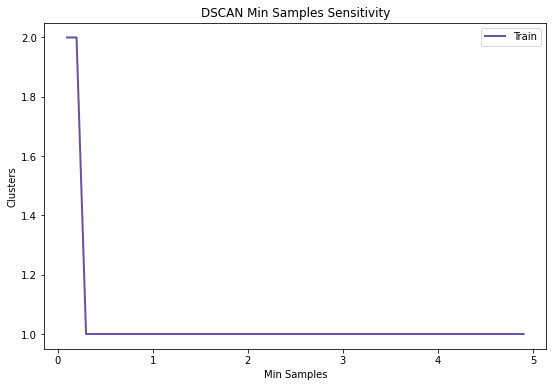

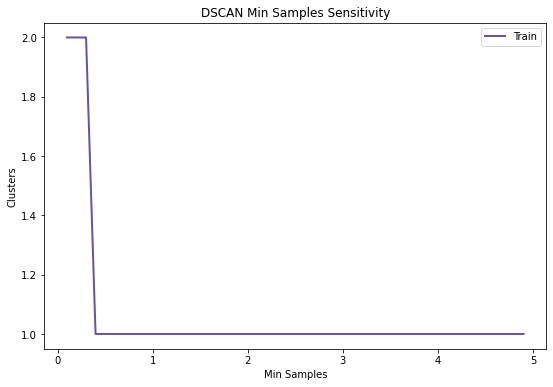


 Red Agglomerative hierarchical clustering

Cluster 0 - Most common value of quality: 6 

   Quality 3 - 6 occurrences.
   Quality 4 - 18 occurrences.
   Quality 5 - 79 occurrences.
   Quality 6 - 101 occurrences.
   Quality 7 - 55 occurrences.
   Quality 8 - 6 occurrences.

Cluster 1 - Most common value of quality: 5 

   Quality 3 - 1 occurrences.
   Quality 4 - 13 occurrences.
   Quality 5 - 310 occurrences.
   Quality 6 - 170 occurrences.
   Quality 7 - 30 occurrences.
   Quality 8 - 4 occurrences.

Cluster 2 - Most common value of quality: 6 

   Quality 3 - 1 occurrences.
   Quality 4 - 11 occurrences.
   Quality 5 - 79 occurrences.
   Quality 6 - 97 occurrences.
   Quality 7 - 32 occurrences.
   Quality 8 - 3 occurrences.

Cluster 3 - Most common value of quality: 5 

   Quality 3 - 1 occurrences.
   Quality 4 - 6 occurrences.
   Quality 5 - 95 occurrences.
   Quality 6 - 93 occurrences.
   Quality 7 - 21 occurrences.
   Quality 8 - 1 occurrences.

Cluster 4 - Most common value

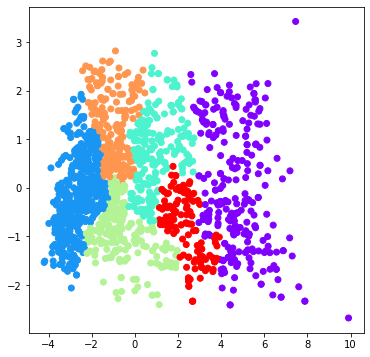


 White Agglomerative hierarchical clustering

Cluster 0 - Most common value of quality: 6 

   Quality 3 - 4 occurrences.
   Quality 4 - 22 occurrences.
   Quality 5 - 698 occurrences.
   Quality 6 - 922 occurrences.
   Quality 7 - 340 occurrences.
   Quality 8 - 68 occurrences.

Cluster 1 - Most common value of quality: 6 

   Quality 3 - 4 occurrences.
   Quality 4 - 46 occurrences.
   Quality 5 - 258 occurrences.
   Quality 6 - 500 occurrences.
   Quality 7 - 235 occurrences.
   Quality 8 - 50 occurrences.
   Quality 9 - 2 occurrences.

Cluster 2 - Most common value of quality: 6 

   Quality 3 - 2 occurrences.
   Quality 4 - 36 occurrences.
   Quality 5 - 106 occurrences.
   Quality 6 - 180 occurrences.
   Quality 7 - 85 occurrences.
   Quality 8 - 15 occurrences.
   Quality 9 - 1 occurrences.

Cluster 3 - Most common value of quality: 5 

   Quality 3 - 1 occurrences.
   Quality 4 - 5 occurrences.
   Quality 5 - 10 occurrences.
   Quality 6 - 9 occurrences.
   Quality 7 - 3 occur

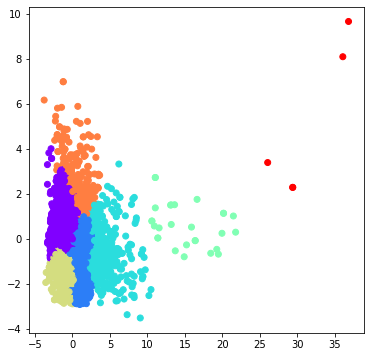

Quality Labels:
0 - Mau
1 - Bom
2 - Excelente

######Supervised Learning Algorithms######

Red : Accuracy of Decision Trees Classifier: 99.0 %


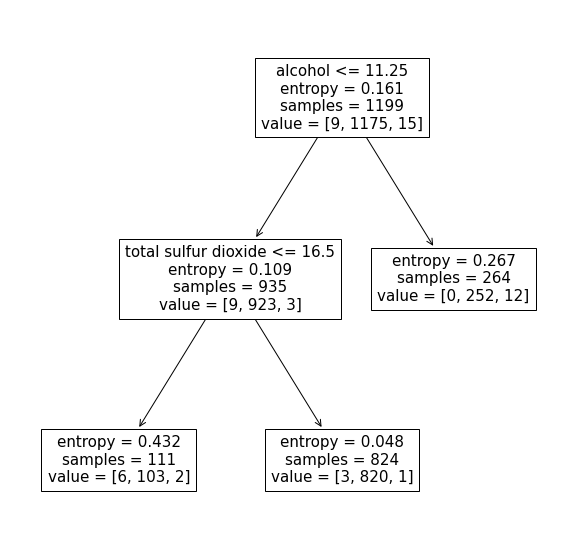

White : Accuracy of Decision Trees Classifier: 96.48979591836735 %


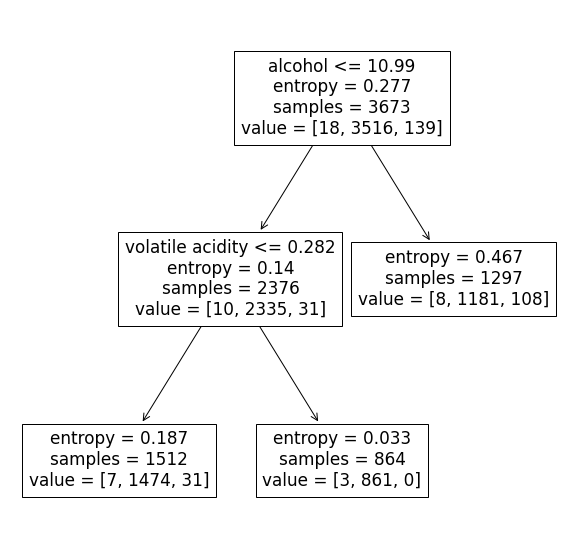

c:\users\loure\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Red : Accuracy of Multi-layer perceptron Classifier: 98.95833333333334 %
White : Accuracy of Multi-layer perceptron Classifier: 96.4625850340136 %

Red : Accuracy of k-NN classifier: 98.95833333333334 %
White : Accuracy of k-NN classifier: 95.85034013605443 %

######Unsupervised Learning Algorithms######

k-Means:

 Red :
Cluster 0 - Most common value of quality: 1 

   Quality 0 - 7 occurrences.
   Quality 1 - 703 occurrences.
   Quality 2 - 12 occurrences.

Cluster 1 - Most common value of quality: 1 

   Quality 1 - 261 occurrences.
   Quality 2 - 3 occurrences.

Cluster 2 - Most common value of quality: 1 

   Quality 0 - 3 occurrences.
   Quality 1 - 504 occurrences.
   Quality 2 - 3 occurrences.

Cluster 3 - Most common value of quality: 1 

   Quality 1 - 103 occurrences.


 White :
Cluster 0 - Most common value of quality: 1 

   Quality 0 - 8 occurrences.
   Quality 1 - 712 occurrences.
   Quality 2 - 11 occurrences.

Cluster 1 - Most common value of quality: 1 

   Quality 0 

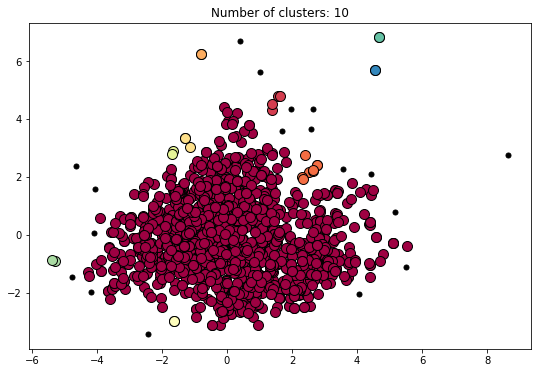

Cluster 0 - Most common value of quality: 0 

   Quality 0 - 1554 occurrences.

Cluster 1 - Most common value of quality: 1 

   Quality 1 - 4 occurrences.

Cluster 2 - Most common value of quality: 2 

   Quality 2 - 8 occurrences.

Cluster 3 - Most common value of quality: 3 

   Quality 3 - 2 occurrences.

Cluster 4 - Most common value of quality: 4 

   Quality 4 - 3 occurrences.

Cluster 5 - Most common value of quality: 5 

   Quality 5 - 2 occurrences.

Cluster 6 - Most common value of quality: 6 

   Quality 6 - 2 occurrences.

Cluster 7 - Most common value of quality: 7 

   Quality 7 - 2 occurrences.

Cluster 8 - Most common value of quality: 8 

   Quality 8 - 2 occurrences.

Cluster 9 - Most common value of quality: -1 

   Quality -1 - 18 occurrences.
   Quality 9 - 2 occurrences.


 White DBscan



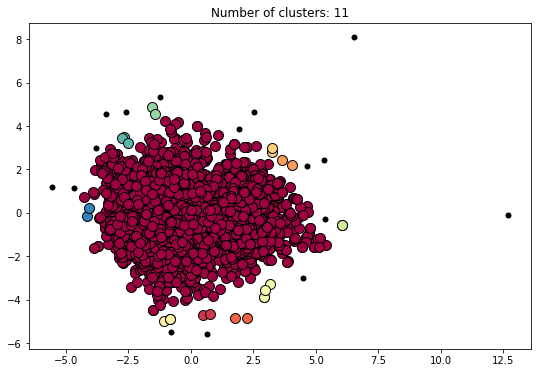

Cluster 0 - Most common value of quality: 0 

   Quality 0 - 4858 occurrences.

Cluster 1 - Most common value of quality: 1 

   Quality 1 - 2 occurrences.

Cluster 2 - Most common value of quality: 2 

   Quality 2 - 2 occurrences.

Cluster 3 - Most common value of quality: 3 

   Quality 3 - 2 occurrences.

Cluster 4 - Most common value of quality: 4 

   Quality 4 - 2 occurrences.

Cluster 5 - Most common value of quality: 5 

   Quality 5 - 3 occurrences.

Cluster 6 - Most common value of quality: 6 

   Quality 6 - 4 occurrences.

Cluster 7 - Most common value of quality: 7 

   Quality 7 - 2 occurrences.

Cluster 8 - Most common value of quality: 8 

   Quality 8 - 2 occurrences.

Cluster 9 - Most common value of quality: 9 

   Quality 9 - 3 occurrences.

Cluster 10 - Most common value of quality: -1 

   Quality -1 - 16 occurrences.
   Quality 10 - 2 occurrences.



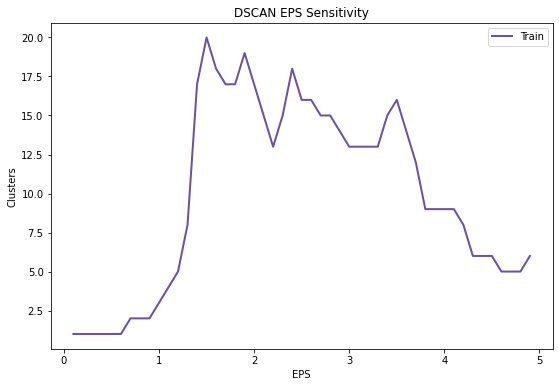

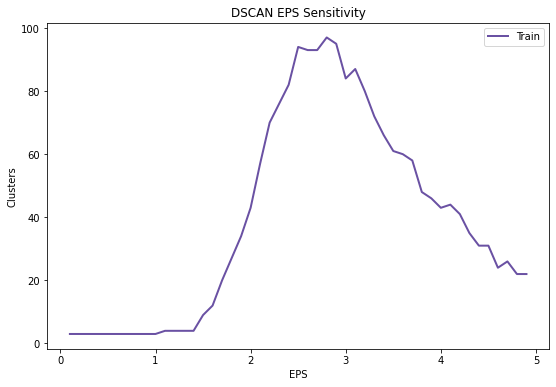

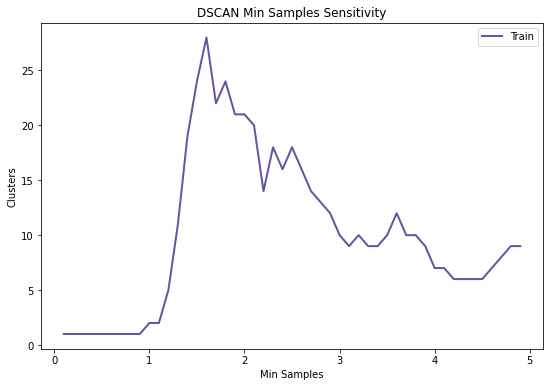

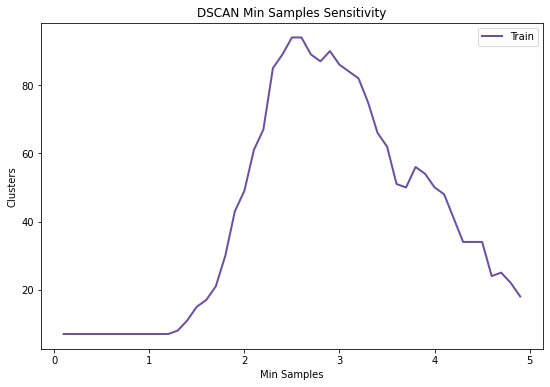


 Red Agglomerative hierarchical clustering

Cluster 0 - Most common value of quality: 1 

   Quality 0 - 2 occurrences.
   Quality 1 - 382 occurrences.

Cluster 1 - Most common value of quality: 1 

   Quality 0 - 2 occurrences.
   Quality 1 - 257 occurrences.
   Quality 2 - 6 occurrences.

Cluster 2 - Most common value of quality: 1 

   Quality 0 - 6 occurrences.
   Quality 1 - 452 occurrences.
   Quality 2 - 4 occurrences.

Cluster 3 - Most common value of quality: 1 

   Quality 1 - 480 occurrences.
   Quality 2 - 8 occurrences.



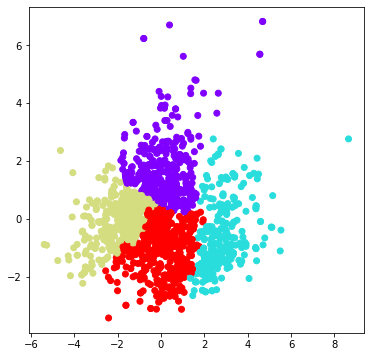


 White Agglomerative hierarchical clustering

Cluster 0 - Most common value of quality: 1 

   Quality 0 - 3 occurrences.
   Quality 1 - 1818 occurrences.
   Quality 2 - 108 occurrences.

Cluster 1 - Most common value of quality: 1 

   Quality 0 - 7 occurrences.
   Quality 1 - 1085 occurrences.
   Quality 2 - 11 occurrences.

Cluster 2 - Most common value of quality: 1 

   Quality 0 - 6 occurrences.
   Quality 1 - 1148 occurrences.
   Quality 2 - 49 occurrences.

Cluster 3 - Most common value of quality: 1 

   Quality 0 - 4 occurrences.
   Quality 1 - 647 occurrences.
   Quality 2 - 12 occurrences.



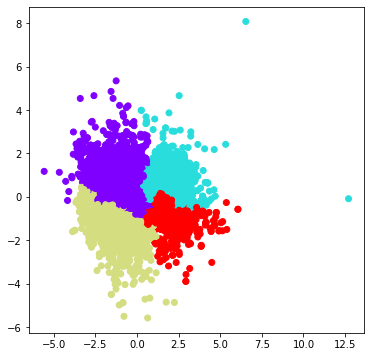

WIP
WIP


In [194]:
m = Main()
m.loadfiles("winequality-red.csv", "winequality-white.csv")

Normalization = True
Discretization = True
Reduction = True

if Normalization:
    dataR_normalization = m.normalization(m.datasetR)
    dataW_normalization = m.normalization(m.datasetW)
    runAlgorithms(dataR_normalization,dataW_normalization, 6,7 ,0.5 , 2, 3)

if Discretization:
    labels=["Mau", "Bom", "Excelente"]
    print("Quality Labels:")
    for i in range(len(labels)):
        print(i,"-",labels[i])
    print()
    dataR_discretization = m.discretization(m.datasetR)
    dataW_discretization = m.discretization(m.datasetW)
    runAlgorithms(dataR_discretization,dataW_discretization, 4,4 ,0.5 , 2, 3)
    
if Reduction:
    dataR_reduction = m.reduction(m.datasetR)
    dataW_reduction = m.reduction(m.datasetW)